<Axes: xlabel='day', ylabel='total_bill'>

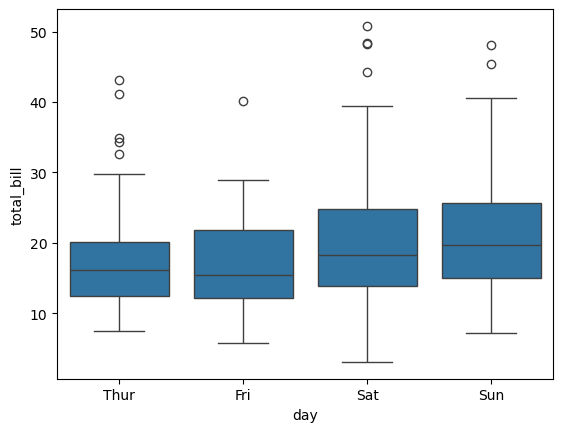

In [9]:
import seaborn as sns
tips = sns.load_dataset('tips')

sns.boxplot(x='day', y='total_bill', data=tips)

In [ ]:
# Let's explore the tips dataset
print("Columns in tips dataset:")
print(tips.columns.tolist())
print("\nFirst few rows:")
print(tips.head())